# Tarea 2: Errores en la computación

# 1.Exponencial, serie alternante (serieEn)

Objetivo: Analizar el uso de la cancelación substractiva

Copia textual del libro Computational Physics.




### * Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

Para esto creamos la siguiente función: 

In [77]:
from math import exp
def negative_exponential(x,N=100):
    n_term = lambda n: (-x)**n / np.math.factorial(n)
    suma = 0
    for i in range(0,N+1):
        suma += n_term(i)
    return suma

In [78]:
print(negative_exponential(0.5))
print(exp(-0.5))

0.6065306597126333
0.6065306597126334


Se observa que la función, que tiene como defecto 100 puntos, da un resultado muy similar al de la función por defecto exp de python math, usando este valor n. 

### * Calculate your series for $x \le 1$ and compare it to the built-in function exp(x) (you may assume that the built-in exponential function is exact). You should pick an N for which the next term in the series is no more than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

Vamos a calcular este valor de N añadiendo una condición a la función:

In [79]:
import numpy as np

def negative_exponential(x,N=100):
    n_term = lambda n: (-x)**n / np.math.factorial(n)
    suma = 0
    for i in range(0,N+1):
        
        suma += n_term(i)
        if  abs(n_term(i+1)) <= abs(1e-7*suma):
            break
    return suma,i


Vamos a evaluar a x en el rango $[0.1,1]$ para la función creada y compararlo con el valor de la función por defecto exp. A su vez, vamos a comparar el valor de N para cada caso.

In [80]:
x = np.linspace(0.1,1,10)
for l in x:
    print('x = {:.2f}, exact = {:.16f}, implemented = {:.16f}  N = {}'.format(l, 
                                                                exp(-l),
                                                                negative_exponential(l)[0],
                                                                negative_exponential(l)[1]))

x = 0.10, exact = 0.9048374180359595, implemented = 0.9048375000000001  N = 4
x = 0.20, exact = 0.8187307530779818, implemented = 0.8187307555555556  N = 6
x = 0.30, exact = 0.7408182206817179, implemented = 0.7408182624999999  N = 6
x = 0.40, exact = 0.6703200460356393, implemented = 0.6703200304761903  N = 7
x = 0.50, exact = 0.6065306597126334, implemented = 0.6065306648375496  N = 8
x = 0.60, exact = 0.5488116360940265, implemented = 0.5488116622857143  N = 8
x = 0.70, exact = 0.4965853037914095, implemented = 0.4965852964750963  N = 9
x = 0.80, exact = 0.4493289641172216, implemented = 0.4493289365446208  N = 9
x = 0.90, exact = 0.4065696597405991, implemented = 0.4065696670509398  N = 10
x = 1.00, exact = 0.3678794411714423, implemented = 0.3678794642857144  N = 10


### * Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation at 
$n \approx x − 1$ .

Vamos a modificar nuestra función para mostrar cada termino actual de la serie, el termino anterior y la suma total. A su vez vamos a visualizar la cancelación que se da cuando $n \approx x-1$. En este caso escogimos $x=10$ por tanto vamos a visualizar especialmente en $n=9$. 

In [81]:
def negative_exponential(x,N=150):
    n_term = lambda n: (-x)**n / np.math.factorial(n)
    suma = 0
    for i in range(0,N+1):
        suma += n_term(i)
        print('n = {} n_term = {:.10f} n+1_term = {:.10f} diference = {:.10f} suma = {:.10f}'.format(i,n_term(i),n_term(i+1),
                                                                                           n_term(i)+n_term(i+1),suma))
    return suma

In [82]:
negative_exponential(10,N=20)

n = 0 n_term = 1.0000000000 n+1_term = -10.0000000000 diference = -9.0000000000 suma = 1.0000000000
n = 1 n_term = -10.0000000000 n+1_term = 50.0000000000 diference = 40.0000000000 suma = -9.0000000000
n = 2 n_term = 50.0000000000 n+1_term = -166.6666666667 diference = -116.6666666667 suma = 41.0000000000
n = 3 n_term = -166.6666666667 n+1_term = 416.6666666667 diference = 250.0000000000 suma = -125.6666666667
n = 4 n_term = 416.6666666667 n+1_term = -833.3333333333 diference = -416.6666666667 suma = 291.0000000000
n = 5 n_term = -833.3333333333 n+1_term = 1388.8888888889 diference = 555.5555555556 suma = -542.3333333333
n = 6 n_term = 1388.8888888889 n+1_term = -1984.1269841270 diference = -595.2380952381 suma = 846.5555555556
n = 7 n_term = -1984.1269841270 n+1_term = 2480.1587301587 diference = 496.0317460317 suma = -1137.5714285714
n = 8 n_term = 2480.1587301587 n+1_term = -2755.7319223986 diference = -275.5731922399 suma = 1342.5873015873
n = 9 n_term = -2755.7319223986 n+1_term =

13.396865995695713

n = 9 n_term = -2755.7319223986 n+1_term = 2755.7319223986 diference = 0.0000000000 suma = -1413.1446208113


Evidentemente como se describio en el númeral, en el termino $n = x-1$, en este caso $n=9$ ocurre una cancelación sustractiva, la cual debe dar un valor muy cercano a 0. Si miramos la diferencia vemos que el valor es tan pequeño que la computadora lo interpreta como un 0. 

### * By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

In [83]:
def negative_exponential(x,N=150):
    n_term = lambda n: (-x)**n / np.math.factorial(n)
    suma = 0
    for i in range(0,N+1):
        suma += n_term(i)
    return suma

Primero vamos a analizar entre 1 y 10, creando un lispace de 30 puntos y evaluando los valores de la función implementada y la función "exacta". 

In [84]:
x = np.linspace(1,10,30)
for l in x:
    print('x = {:.2f}, exact = {:.16f}, implemented = {:.16f}, % error {:.16f}'.format(l, 
                                                                exp(-l),
                                                                negative_exponential(l),
                                                                abs((negative_exponential(l) - exp(-l))/exp(-l))*100
                                                                ))

x = 1.00, exact = 0.3678794411714423, implemented = 0.3678794411714424, % error 0.0000000000000302
x = 1.31, exact = 0.2697270310257103, implemented = 0.2697270310257102, % error 0.0000000000000206
x = 1.62, exact = 0.1977622642740714, implemented = 0.1977622642740714, % error 0.0000000000000281
x = 1.93, exact = 0.1449981228135778, implemented = 0.1449981228135778, % error 0.0000000000000000
x = 2.24, exact = 0.1063117662848175, implemented = 0.1063117662848173, % error 0.0000000000002219
x = 2.55, exact = 0.0779471584272076, implemented = 0.0779471584272077, % error 0.0000000000001068
x = 2.86, exact = 0.0571503956636256, implemented = 0.0571503956636251, % error 0.0000000000008013
x = 3.17, exact = 0.0419023321749326, implemented = 0.0419023321749324, % error 0.0000000000005134
x = 3.48, exact = 0.0307225421855812, implemented = 0.0307225421855817, % error 0.0000000000016600
x = 3.79, exact = 0.0225255862705769, implemented = 0.0225255862705763, % error 0.0000000000028186
x = 4.10, 

Se observa que para estos valores de x, el algoritmo todavía presenta una presición relativamente buena. 
Vamos a observar el comportamiento para x en el intervalo $[10,20]$

In [85]:
x = np.linspace(10,20,30)
for l in x:
    print('x = {:.2f}, exact = {:.16f},   implemented = {:.16f},   % error {:.16f}'.format(l, 
                                                                exp(-l),
                                                                negative_exponential(l),
                                                                abs((negative_exponential(l) - exp(-l))/exp(-l))*100
                                                                ))

x = 10.00, exact = 0.0000453999297625,   implemented = 0.0000453999294336,   % error 0.0000007243971005
x = 10.34, exact = 0.0000321586984290,   implemented = 0.0000321586980807,   % error 0.0000010830383509
x = 10.69, exact = 0.0000227793719078,   implemented = 0.0000227793707640,   % error 0.0000050212846881
x = 11.03, exact = 0.0000161355965839,   implemented = 0.0000161355971424,   % error 0.0000034608622239
x = 11.38, exact = 0.0000114295283546,   implemented = 0.0000114295268932,   % error 0.0000127860420423
x = 11.72, exact = 0.0000080960203565,   implemented = 0.0000080960225463,   % error 0.0000270478598109
x = 12.07, exact = 0.0000057347550642,   implemented = 0.0000057347546390,   % error 0.0000074139087510
x = 12.41, exact = 0.0000040621705725,   implemented = 0.0000040621674151,   % error 0.0000777273430351
x = 12.76, exact = 0.0000028774079407,   implemented = 0.0000028774064409,   % error 0.0000521240804703
x = 13.10, exact = 0.0000020381902507,   implemented = 0.0000020

En este caso podemos observar que para valores cercanos a $x=17$ el algoritmo empieza a perder significativamente presición. Para valores mayores a $x=19$ el algoritmo ya ni siquiera converge al valor exacto, la presición no es ni de una cifra significativa.

Ahora, observemos que para $x>20$ el % de error es absurdamente alto, el algoritmo ya no funciona debido a los diferentes tipos de errores que se han ido propagando. 

In [86]:
x = np.linspace(20,40,10)
for l in x:
    print('x = {:.2f}, exact = {:.16f},   implemented = {:.16f},   % error {:.16f}'.format(l, 
                                                                exp(-l),
                                                                negative_exponential(l),
                                                                abs((negative_exponential(l) - exp(-l))/exp(-l))*100
                                                                ))

x = 20.00, exact = 0.0000000020611536,   implemented = 0.0000000013081483,   % error 36.5331964736455035
x = 22.22, exact = 0.0000000002233631,   implemented = -0.0000000673156749,   % error 30237.3242669200335513
x = 24.44, exact = 0.0000000000242054,   implemented = -0.0000000221622530,   % error 91659.0427512256865157
x = 26.67, exact = 0.0000000000026231,   implemented = -0.0000068837597883,   % error 262429139.6296002864837646
x = 28.89, exact = 0.0000000000002843,   implemented = -0.0000821561459146,   % error 28901813338.7715759277343750
x = 31.11, exact = 0.0000000000000308,   implemented = -0.0005136399853431,   % error 1667411169449.1948242187500000
x = 33.33, exact = 0.0000000000000033,   implemented = -0.0099369432593154,   % error 297670323939048.8125000000000000
x = 35.56, exact = 0.0000000000000004,   implemented = 0.0101835219495775,   % error 2815007670577312.0000000000000000
x = 37.78, exact = 0.0000000000000000,   implemented = 0.3523366071327877,   % error 898748534

En este caso, incluso el algoritmo implementado por defecto en python arroja un valor de 0 a partir de $x=37$, esto ya que el computador no tiene la presición suficiente para representar números de tipo punto flotante tan pequeños. 

### *See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all round off errors

En este caso tendriamos que: 

\begin{equation}
e^{-x}= \frac{1}{\sum_{n=0}^{N}   \frac{x^{n}}{n!}}   
\end{equation}




In [87]:
def exponential(x,N=100):
    n_term = lambda n: (x)**n / np.math.factorial(n) 
    suma = 0
    for i in range(0,N+1):
        suma += n_term(i)
    return 1/suma

In [88]:
x = np.linspace(10,20,10)
for l in x:
    print('x = {:.2f}, exact = {:.16f},   implemented = {:.16f},   % error {:.16f}'.format(l, 
                                                                exp(-l),
                                                                exponential(l),
                                                                abs((exponential(l) - exp(-l))/exp(-l))*100
                                                                ))

x = 10.00, exact = 0.0000453999297625,   implemented = 0.0000453999297625,   % error 0.0000000000000149
x = 11.11, exact = 0.0000149453385248,   implemented = 0.0000149453385248,   % error 0.0000000000000453
x = 12.22, exact = 0.0000049199006428,   implemented = 0.0000049199006428,   % error 0.0000000000000000
x = 13.33, exact = 0.0000016195967923,   implemented = 0.0000016195967923,   % error 0.0000000000000131
x = 14.44, exact = 0.0000005331599071,   implemented = 0.0000005331599071,   % error 0.0000000000000199
x = 15.56, exact = 0.0000001755125028,   implemented = 0.0000001755125028,   % error 0.0000000000000151
x = 16.67, exact = 0.0000000577774852,   implemented = 0.0000000577774852,   % error 0.0000000000000344
x = 17.78, exact = 0.0000000190199430,   implemented = 0.0000000190199430,   % error 0.0000000000000522
x = 18.89, exact = 0.0000000062612319,   implemented = 0.0000000062612319,   % error 0.0000000000000264
x = 20.00, exact = 0.0000000020611536,   implemented = 0.0000000

In [89]:
x = np.linspace(10,20,10)
for l in x:
    print('x = {:.2f}, exact = {:.16f},   implemented = {:.16f},   % error {:.16f}'.format(l, 
                                                                exp(-l),
                                                                exponential(l),
                                                                abs((exponential(l) - exp(-l))/exp(-l))*100
                                                                ))

x = 10.00, exact = 0.0000453999297625,   implemented = 0.0000453999297625,   % error 0.0000000000000149
x = 11.11, exact = 0.0000149453385248,   implemented = 0.0000149453385248,   % error 0.0000000000000453
x = 12.22, exact = 0.0000049199006428,   implemented = 0.0000049199006428,   % error 0.0000000000000000
x = 13.33, exact = 0.0000016195967923,   implemented = 0.0000016195967923,   % error 0.0000000000000131
x = 14.44, exact = 0.0000005331599071,   implemented = 0.0000005331599071,   % error 0.0000000000000199
x = 15.56, exact = 0.0000001755125028,   implemented = 0.0000001755125028,   % error 0.0000000000000151
x = 16.67, exact = 0.0000000577774852,   implemented = 0.0000000577774852,   % error 0.0000000000000344
x = 17.78, exact = 0.0000000190199430,   implemented = 0.0000000190199430,   % error 0.0000000000000522
x = 18.89, exact = 0.0000000062612319,   implemented = 0.0000000062612319,   % error 0.0000000000000264
x = 20.00, exact = 0.0000000020611536,   implemented = 0.0000000

### Importante: 
Evidentemente el hecho de eliminar el error por la cancelación sustractiva implementando el algoritmo de la forma $e^{-x} = \frac{1}{e^x}$ mejora muchisimo la presición para grandes valores de x. Antes el algoritmo empezaba a perder presición alrededor de $x \geq 17$, sin embargo, ahora que se elimino la cancelación sustractiva, el algoritmo todavía muestra una buena presición en estos valores cuando se compara con los valores exactos (Implementación por defecto en python). 

### * Make a series of graphs of the error versus N for different values of x.

Para esto vamos a usar el error absoluto y vamos a vectorizar las funciones que establecimos anteriormente.
En este caso es interesante ver como aumenta progresivamente el error a medida que aumenta el valor de x. En especial, cada vez que x se aumenta en 10 unidades el error aumenta considerablemente comparado con el error de los x más bajos en ese intervalo. 
En este caso se muestran las gráficas del error absoluto vs x en diferentes intervalos:

In [90]:
vector_i = np.vectorize(negative_exponential)
vector_r = np.vectorize(exp)

Text(0, 0.5, 'Absolute error')

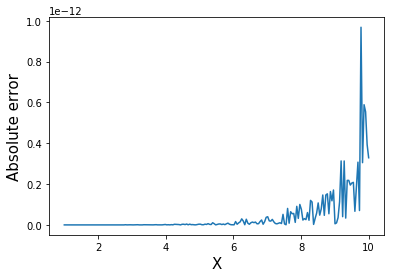

In [91]:
from matplotlib import pyplot as plt
x = np.linspace(1,10,200)
plt.plot(x, abs(vector_i(x) - vector_r(-x)))
plt.xlabel('X',size=15)
plt.ylabel('Absolute error',size=15)

Text(0, 0.5, 'Absolute error')

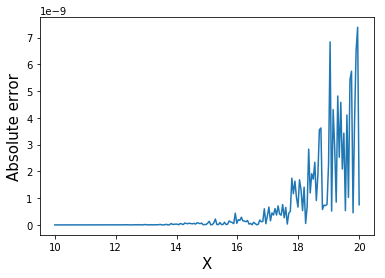

In [92]:
x = np.linspace(10,20,200)
plt.plot(x, abs(vector_i(x) - vector_r(-x)))
plt.xlabel('X',size=15)
plt.ylabel('Absolute error',size=15)

Text(0, 0.5, 'Absolute error')

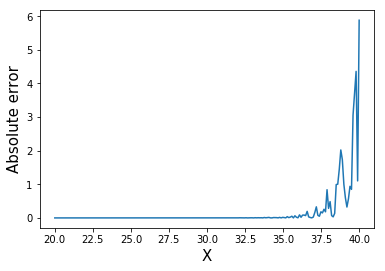

In [93]:
x = np.linspace(20,40,200)
plt.plot(x, abs(vector_i(x) - vector_r(-x)))
plt.xlabel('X',size=15)
plt.ylabel('Absolute error',size=15)

# 2. Errores de redondeo. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)


Un ejemplo clásico de caos, es el comportamiento no lineal en las interaciones de un mapa logistico. 
\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

# Problema:
Encontrar tres formas diferentes de expresar  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib.

Primero vamos a escribir de 3 formas diferentes la función:

In [377]:
def f1(x_n,r):
    x_n_1 = (r / x_n**2) * (x_n**3 - x_n**4)
    return x_n_1
    
def f2(x_n,r):
    x_n_1 = r * (x_n - x_n**2)
    return x_n_1

def f3(x_n,r):
    x_n_1 = r * x_n**2 * ( (1/x_n) - 1)
    return x_n_1
    

Ahora vamos a definir los parametros en los cuales vamos a evaluar las funciones: 

In [384]:
r = [1.9, 2.9, 3.1, 3.7, 3.9]
numpoints = 100

### Para r = 1.9: 

Text(0, 0.5, 'f3')

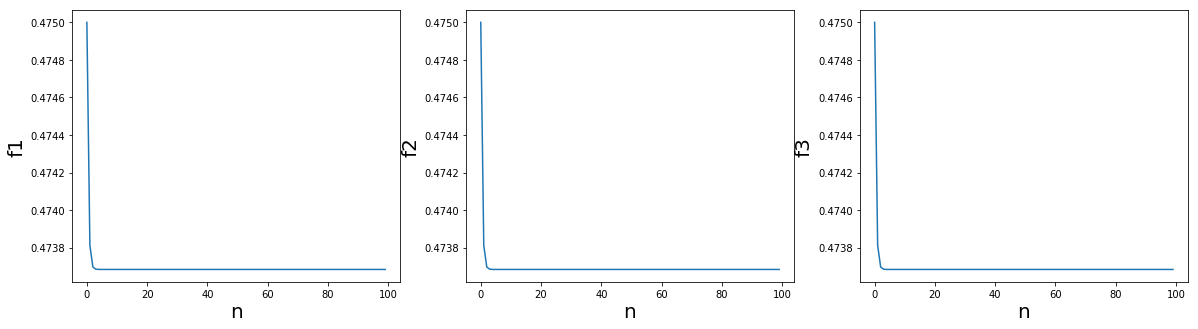

In [379]:
from matplotlib import pyplot as plt

X = np.zeros((3,numpoints))
n = np.arange(0,numpoints,1)
f = [f1,f2,f3]

for k in range(0,3):
    x0 = 0.5
    for i in range(0,numpoints):
        x = f[k](x0, 1.9)
        x0 = x
        X[k,i] = x0

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(n,X[0])
plt.xlabel('n',size='20')
plt.ylabel('f1',size='20')

plt.subplot(132)
plt.plot(n,X[1])
plt.xlabel('n',size='20')
plt.ylabel('f2',size='20')

plt.subplot(133)
plt.plot(n,X[2])
plt.xlabel('n',size='20')
plt.ylabel('f3',size='20')

### Para r = 2.9

Text(0, 0.5, 'f3')

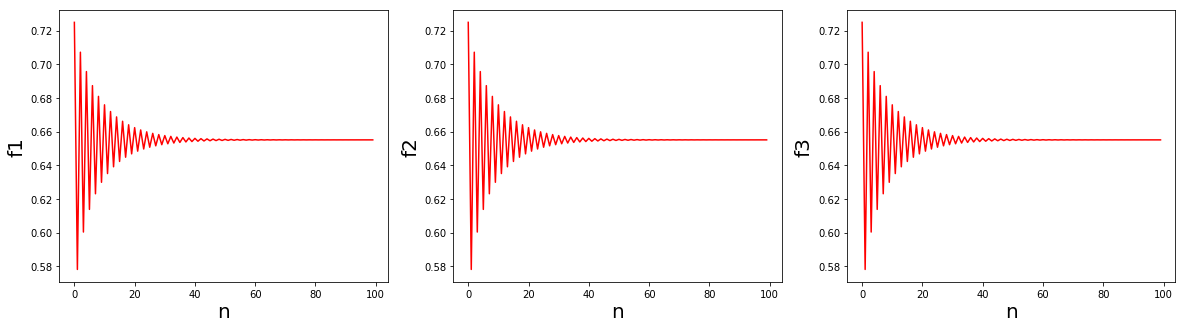

In [380]:
X = np.zeros((3,numpoints))
n = np.arange(0,numpoints,1)
f = [f1,f2,f3]

for k in range(0,3):
    x0 = 0.5
    for i in range(0,numpoints):
        x = f[k](x0, 2.9)
        x0 = x
        X[k,i] = x0

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(n,X[0],'r')
plt.xlabel('n',size='20')
plt.ylabel('f1',size='20')

plt.subplot(132)
plt.plot(n,X[1],'r')
plt.xlabel('n',size='20',)
plt.ylabel('f2',size='20')

plt.subplot(133)
plt.plot(n,X[2],'r')
plt.xlabel('n',size='20')
plt.ylabel('f3',size='20')



### Para r = 3.1

Text(0, 0.5, 'f3')

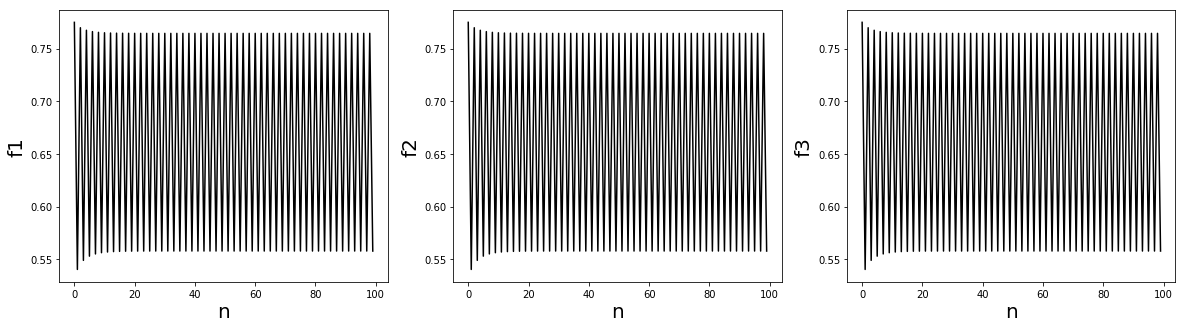

In [383]:
X = np.zeros((3,numpoints))
n = np.arange(0,numpoints,1)
f = [f1,f2,f3]

for k in range(0,3):
    x0 = 0.5
    for i in range(0,numpoints):
        x = f[k](x0, 3.1)
        x0 = x
        X[k,i] = x0

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(n,X[0],'k')
plt.xlabel('n',size='20')
plt.ylabel('f1',size='20')

plt.subplot(132)
plt.plot(n,X[1],'k')
plt.xlabel('n',size='20',)
plt.ylabel('f2',size='20')

plt.subplot(133)
plt.plot(n,X[2],'k')
plt.xlabel('n',size='20')
plt.ylabel('f3',size='20')

### Para r = 3.7

Text(0, 0.5, 'f3')

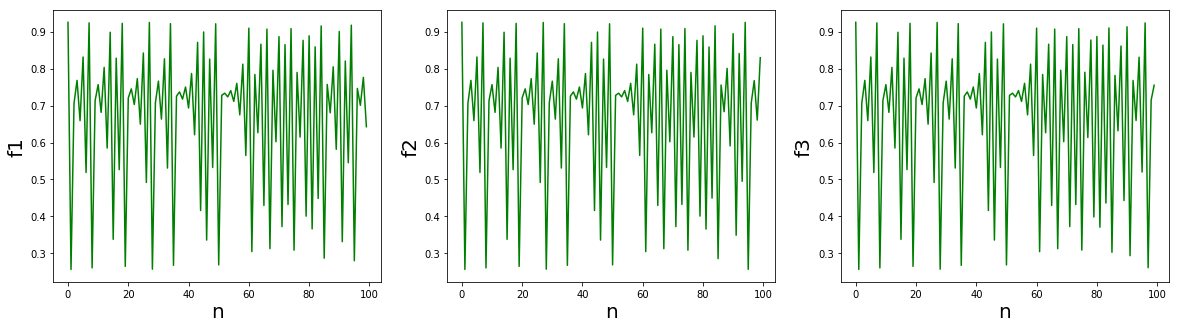

In [387]:
X = np.zeros((3,numpoints))
n = np.arange(0,numpoints,1)
f = [f1,f2,f3]

for k in range(0,3):
    x0 = 0.5
    for i in range(0,numpoints):
        x = f[k](x0, 3.7)
        x0 = x
        X[k,i] = x0

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(n,X[0],'g')
plt.xlabel('n',size='20')
plt.ylabel('f1',size='20')

plt.subplot(132)
plt.plot(n,X[1],'g')
plt.xlabel('n',size='20',)
plt.ylabel('f2',size='20')

plt.subplot(133)
plt.plot(n,X[2],'g')
plt.xlabel('n',size='20')
plt.ylabel('f3',size='20')

### Para r = 3.9

Text(0, 0.5, 'f3')

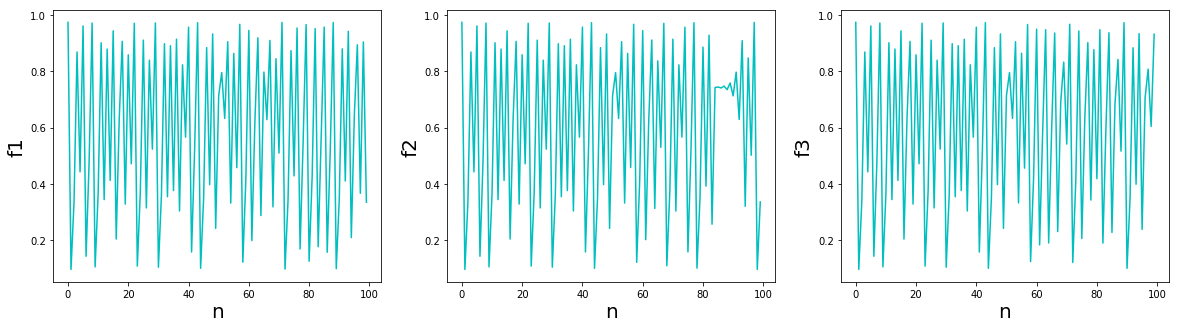

In [402]:
X = np.zeros((3,numpoints))
n = np.arange(0,numpoints,1)
f = [f1,f2,f3]

for k in range(0,3):
    x0 = 0.5
    for i in range(0,numpoints):
        x = f[k](x0, 3.9)
        x0 = x
        X[k,i] = x0

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(n,X[0],'c')
plt.xlabel('n',size='20')
plt.ylabel('f1',size='20')

plt.subplot(132)
plt.plot(n,X[1],'c')
plt.xlabel('n',size='20',)
plt.ylabel('f2',size='20')

plt.subplot(133)
plt.plot(n,X[2],'c')
plt.xlabel('n',size='20')
plt.ylabel('f3',size='20')

# Conclusión: 

Al principio, para valores pequeños de r, analizando las gráficas se observa que el sistema tiene cierta estabilidad y los valores de la función respecto al número de iteraciones no cambian mucho entre las 3 formas de escribir la función. Sin embargo, a medida que se aumenta r y sobretodo para los valores más cercanos a 4 se observa como las gráficas entre cada una de las funciones empiezan a comportarse de una manera diferente. Tanto así, que para la ultima iteración, el valor de la función es diferente para cada uno de las 3 maneras de escribir la función, y difieren en gran medida. Esto nos deja ver la importancia que tienen los errores de redondeo, ya que, a pesar de ser la misma función, al escribirla de 3 maneras diferentes los errores al computar son diferentes, habiendo más o menos errores en algunos casos. Estos pequeños errores son los que llevan a que las 3 graficas den valores diferentes mientras más aumenta n, y sobretodo en este caso cuya ecuación describe un comportamiento caótico o no lineal, las pequeñas variaciones (así sean pequeños errores de aproximación) inducen a grandes cambios en el resultado final. 